<a href="https://www.kaggle.com/code/vijays140291/flight-fare-prediction?scriptVersionId=122487131" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting Fare for Airline

# Importing the Library

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Loading the Dataset

In [4]:
df=pd.read_csv('/kaggle/input/airfare-ml-predicting-flight-fares/Cleaned_dataset.csv')
df

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [5]:
len(df['Flight_code'].unique())

1405

# Getting the Preliminary Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


# Checking for Missing Values

In [7]:
df.isna().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

* There are no missing values in the dataset

# Number of Flights each day of the week

<AxesSubplot:>

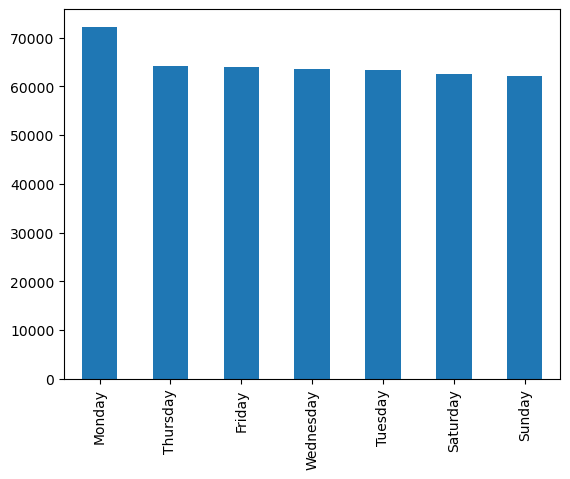

In [8]:
df['Journey_day'].value_counts().plot(kind='bar')

# Total Number of Flights for each Airline

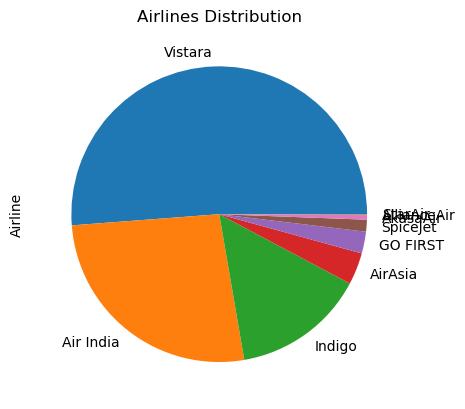

In [9]:
df['Airline'].value_counts().plot(kind='pie')
plt.title('Airlines Distribution')
plt.show()

# Ticket Class Distribution

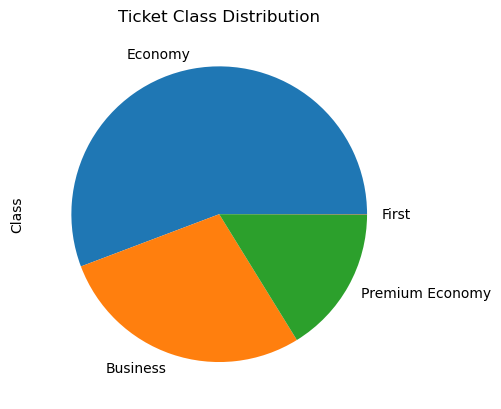

In [10]:
df['Class'].value_counts().plot(kind='pie')
plt.title('Ticket Class Distribution')
plt.show()

In [11]:
df['Class'].value_counts()

Economy            252033
Business           126834
Premium Economy     73077
First                 144
Name: Class, dtype: int64

# Checking the Descriptive Statistics for Continuous Features

In [12]:
df.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


# Scatter Plot between Fare and Duration

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


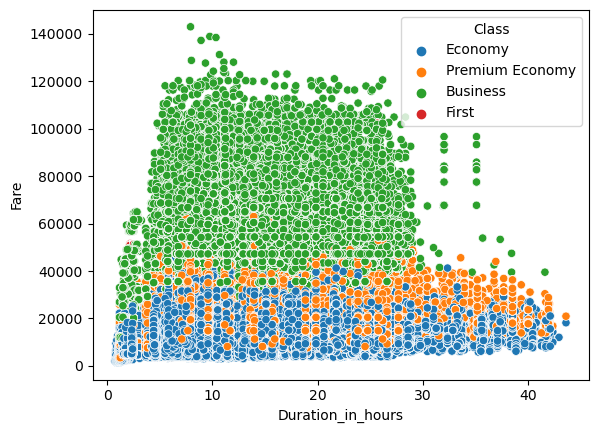

In [23]:
sns.scatterplot(y='Fare',x='Duration_in_hours',data=df,hue='Class')

plt.show()

In [24]:
df['Departure'].unique()

array(['After 6 PM', 'Before 6 AM', '12 PM - 6 PM', '6 AM - 12 PM'],
      dtype=object)

# Creating Preprocess Function

In [57]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [68]:
def preprocess_inputs(df):
    df=df.copy()
    #extracting the number part from flight_code
    df['code'] = df['Flight_code'].apply(lambda x: int(x.split('-')[1]))
    df=df.drop('Flight_code',axis=1)
    stop_encoding={'non-stop':0, '1-stop':1, '2+-stop':2}
    df['Total_stops']=df['Total_stops'].replace(stop_encoding)
    journey_encoding={'Sunday':0,'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}
    df['Journey_day']=df['Journey_day'].replace(journey_encoding)
    df['Date_of_journey']=pd.to_datetime(df['Date_of_journey'])
    df['journey_month']=df['Date_of_journey'].dt.month
    df['journey_year']=df['Date_of_journey'].dt.year
    df['journey_day']=df['Date_of_journey'].dt.day
    df=df.drop('Date_of_journey',axis=1)
    class_encoding={'Economy':0, 'Premium Economy':1, 'Business':2, 'First':3}
    df['Class']=df['Class'].replace(class_encoding)
    onehot_columns=['Airline','Source','Departure','Arrival','Destination']
    df=onehot_encode(df,onehot_columns)
    #splitting between x and y
    y=df['Fare']
    x=df.drop('Fare',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    #scaling
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    return x_train,x_test,y_train,y_test

In [69]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(316461, 40)
(135627, 40)
(316461,)
(135627,)


# Training the Model

# Linear Regression

In [72]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7697951013341974

In [76]:
y_pred=model.predict(x_test)
root_mean_square_error=np.sqrt(np.mean(np.square(y_pred-y_test)))
print('Root Mean Square Error',root_mean_square_error)

Root Mean Square Error 9739.128783914364


# Random Forest Regressor

In [74]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.9658252969645136

In [78]:
y_pred_rf=rf_model.predict(x_test)
rf_root_mean_square_error=np.sqrt(np.mean(np.square(y_pred_rf-y_test)))
print('Root Mean Square Error',rf_root_mean_square_error)

Root Mean Square Error 3752.4524950140035
